1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [239]:
import geopandas as gpd
import os
from fiona.crs import from_epsg
import shapely.geometry
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

In [93]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip'

In [96]:
os.system('wget ' + url)
os.system("mv " + 'nycb2010_16d.zip ' + os.getenv("PUIDATA"))
os.system('unzip ' + os.getenv("PUIDATA") + "/" + "nycb2010_16d.zip " + \
'-d ' +  os.getenv("PUIDATA"))


0

In [ ]:
#tracks
#os.system('wget ' + url)
#os.system("mv " + 'nyct2010_16d.zip ' + os.getenv("PUIDATA"))
#os.system('unzip ' + os.getenv("PUIDATA") + "/" + "nyct2010_16d.zip " + \
#'-d ' +  os.getenv("PUIDATA"))

In [258]:
#blocks
ct_shape = gpd.read_file(os.getenv("PUIDATA") + "/nycb2010_16d/nycb2010.shp" )

In [236]:
#tracks
#ct_shape = gpd.read_file(os.getenv("PUIDATA") + "/nyct2010_16d/nyct2010.shp" )

In [252]:
print fiona.__version__ 
print gpd.__version__

1.7.0.post2
0.2.1


In [259]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
print ct_shape.shape
ct_shape.head()


(38794, 8)


,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [213]:
#polyon with cusp
#ct_shape.loc[35383]

In [254]:
coordinate = '+proj=longlat +ellps=WGS84 +datum=WGS84 + no_defs'

In [261]:
#change the projection system
ct_brk = ct_shape.copy().loc[ct_shape.BoroName == 'Brooklyn',]
ct_brk.crs = from_epsg(2263)
#ct_brk = ct_brk.to_crs(coordinate)
ct_brk.to_crs(epsg=4326, inplace=True)
ct_brk.head(100)


,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5042,30020001000,3,Brooklyn,1000,002000,203150.927230,2076.660170,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5043,30022001000,3,Brooklyn,1000,002200,202989.817092,2080.720191,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5044,30030001000,3,Brooklyn,1000,003000,2288.488412,251.742624,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5045,30031001000,3,Brooklyn,1000,003100,214447.259568,1902.577167,"POLYGON ((-77.5112738205446 39.94622463424534,..."
5046,30033001000,3,Brooklyn,1000,003300,258228.648239,2448.507197,"POLYGON ((-77.5112738205446 39.94622463424534,..."


In [221]:
#ct_brk.loc[35383]

3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [222]:
geolocator = Nominatim()
cuspLocation = geolocator.geocode("1 MetroTech Center, Brooklyn, Nueva York")

cuspPoint = shapely.geometry.Point(cuspLocation.longitude,cuspLocation.latitude)
#cuspPoint = shapely.geometry.Point(-73.9868223,40.692822)
#print(cuspPoint)
print(cuspPoint)

POINT (-73.98671759998339 40.69323015)


4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [223]:
ct_brk.geometry.contains(cuspPoint).sum()

0

In [189]:
ct_brk['cusp']= ct_brk.geometry.contains(cusp)
ct_brk[ct_brk.cusp]

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry,cusp


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [90]:
ct_latlon.shape[0]

760

In [81]:
ct_latlon['forPlot'] = [i%10 == 0 for i in range(ct_latlon.shape[0])]

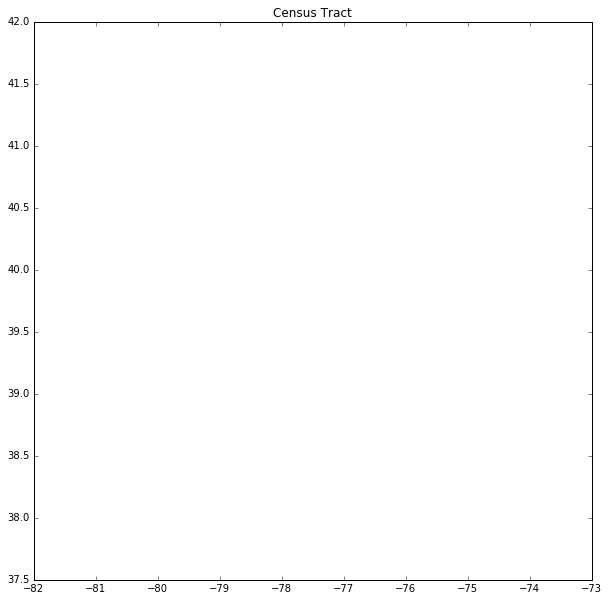

In [91]:
f, ax = plt.subplots(figsize=(10,10))
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

#ct_latlon[ct_latlon.cusp].plot(color = 'red', alpha=1,linewidth=0.5,ax=ax)
ct_latlon.plot(color = 'gray', alpha=.40,linewidth=0.5,ax=ax)
#ct_latlon[ct_latlon.forPlot].plot(color = 'gray', alpha=.40,linewidth=0.5,ax=ax)
#ax.scatter(cusp.x,cusp.y,c='green',s=80)
plt.title("Census Tract")